In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import missingno as msno

### Helper Functions / Setup

In [3]:
# display all columns
from IPython.display import display
def all_cols(df):
    with pd.option_context('display.max_columns', None):
        return display(df)

### Read in data

In [4]:
dir_in = r"data/multifamily_housing/"

def read_year(year):
    return pd.read_csv(dir_in + str(year) + '.csv', 
        na_values=['Not Available'], low_memory = False, index_col=False)

df2020 = read_year(2020)
df2019 = read_year(2019)
df2018 = read_year(2018)
df2017 = read_year(2017)
df2016 = read_year(2016)
df2015 = read_year(2015)

## EDA

I will start EDA on the most recent year of data only (2020) before merging with prior years.

### Structure of data

In [5]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16894 entries, 0 to 16893
Data columns (total 60 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   Unnamed: 0                                                                                                     16894 non-null  int64  
 1   property_id                                                                                                    16894 non-null  int64  
 2   nyc_building_identification_number_bin                                                                         16885 non-null  object 
 3   property_name                                                                                                  16894 non-null  object 
 4   year_ending                                   

Dataset has 16894 rows and 60 columns. Mix of dtypes is 35 floats, 7 ints, and 18 objects.

#### Object type columns

In [6]:
df2020.loc[:, df2020.dtypes == object].head()

,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,natural_gas_use_kbtu,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,borough,nta,multifamily_housing_government_subsidized_housing,multifamily_housing_resident_population_type
0,1076177,CitySpire,2020-12-31T00:00:00.000,New York,10019,"Fast Food Restaurant, Multifamily Housing, Off...",Multifamily Housing,Office,Restaurant,178364.9,No,No,No,No,No,MANHATTAN,Midtown-Midtown South,NaN,NaN
1,1085803,River Place One,2020-12-31T00:00:00.000,New York,10036,"Bowling Alley, Fitness Center/Health Club/Gym,...",Multifamily Housing,Parking,Bowling Alley,49544807.2,No,No,No,No,No,MANHATTAN,Hudson Yards-Chelsea-Flatiron-Union Square,No,NaN
2,1070014,1755 Broadway & 235 W 56th St,2020-12-31T00:00:00.000,New York,10019,"Fitness Center/Health Club/Gym, Heated Swimmin...",Multifamily Housing,Office,Parking,825446.5,No,No,No,Yes,No,NaN,NaN,No,NaN
3,1087842,The Visionaire,2020-12-31T00:00:00.000,New York,10004,"Fitness Center/Health Club/Gym, Multifamily Ho...",Multifamily Housing,Other - Entertainment/Public Assembly,Office,34263364.5,No,No,No,No,No,MANHATTAN,Battery Park City-Lower Manhattan,No,NaN
4,1086547,Site 18B,2020-12-31T00:00:00.000,New York,10282,"Multifamily Housing, Office, Other - Recreatio...",Multifamily Housing,Parking,Other - Recreation,24102180,No,No,No,No,No,NaN,NaN,No,NaN


In [7]:
df2020.describe(exclude="number")

,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,natural_gas_use_kbtu,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,borough,nta,multifamily_housing_government_subsidized_housing,multifamily_housing_resident_population_type
count,16885,16894,16894,16894,16894,16894,16894,3543,1202,16453,16815,16472,16894,16894,16894,16397,16396,11838,11567
unique,16297,16756,1,144,222,451,1,49,44,15977,2,2,2,2,2,5,184,2,6
top,1050288,UNIMAC Developer LLC,2020-12-31T00:00:00.000,New York,11226,Multifamily Housing,Multifamily Housing,Parking,Parking,0,No,No,No,No,No,MANHATTAN,Upper West Side,No,No specific resident population
freq,3,3,16894,5162,442,13351,16894,1355,219,27,16754,16292,16628,15006,16766,5716,613,10176,11357


##### City variable

In [8]:
df2020['city'].value_counts().head(10)

New York         5162
Brooklyn         4008
Bronx            3544
Queens           1638
Manhattan         563
BROOKLYN          284
Flushing          213
BRONX             140
Staten Island     129
NEW YORK          113
Name: city, dtype: int64

In [9]:
df2020['city'] = df2020['city'].str.capitalize()
df2020['city'].value_counts().head(15)

New york            5295
Brooklyn            4351
Bronx               3701
Queens              1727
Manhattan            573
Flushing             223
Staten island        136
Astoria               87
Jamaica               82
Long island city      63
New york city         54
Elmhurst              51
Forest hills          45
The bronx             44
Jackson heights       42
Name: city, dtype: int64

This is a user entered field with no precise meaning - e.g. Bronx and The bronx should be the same.
All properties are technically in New York but some locations are more specific.

##### Natural Gas use

In [10]:
df2020['natural_gas_use_kbtu'].value_counts(dropna=False)

NaN           441
0              27
2216589.1       6
75482269.4      5
5917700.2       3
             ... 
23543400.4      1
16250300.4      1
1343000         1
119336.6        1
1703583.6       1
Name: natural_gas_use_kbtu, Length: 15978, dtype: int64

This should be a float variable, NaNs should reasonably be imputed to 0.

In [11]:
df2020.fillna({'natural_gas_use_kbtu': 0}, inplace=True)

In [12]:
df2020['natural_gas_use_kbtu'][df2020['natural_gas_use_kbtu'] == "Insufficient access"]

13442    Insufficient access
Name: natural_gas_use_kbtu, dtype: object

This "insufficient access" can also be imputed to 0.

In [13]:
df2020['natural_gas_use_kbtu'].replace({"Insufficient access": 0}, inplace= True)
df2020['natural_gas_use_kbtu'] = df2020['natural_gas_use_kbtu'].astype(float)

##### Boolean Features

estimated_data_flag for electricty, natural gas, and energy, default and temporary values, and government subsidized housing have only 2 options so they can be turned in to boolean features.

In [14]:
bool_cols = ['estimated_data_flag_electricity_grid_purchase',
    'estimated_data_flag_natural_gas', 'estimated_values_energy',
    'default_values', 'temporary_values',
    'multifamily_housing_government_subsidized_housing']

In [15]:
df2020[bool_cols] = df2020[bool_cols].astype(bool)

#### Numerical features

In [16]:
df2020.select_dtypes(include = 'number').head()

,Unnamed: 0,property_id,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,...,multifamily_housing_number_of_laundry_hookups_in_all_units,multifamily_housing_number_of_laundry_hookups_in_common_area_s,multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,multifamily_housing_total_number_of_residential_living_units,multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft,multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated
0,0,1407884,375698.0,369742.0,2063.0,1988,95,1,75,115.8,...,20.0,36.0,340.0,340.0,0.90498,0.90498,0.0,0.0,100.0,100.0
1,1,1443214,814289.0,39590.0,37681.0,2000,100,1,68,124.5,...,0.0,78.0,921.0,921.0,1.13105,1.13105,0.0,0.0,100.0,100.0
2,2,1847014,409506.0,277333.0,31417.0,1985,100,1,70,121.8,...,0.0,64.0,482.0,482.0,1.17703,1.17703,0.0,0.0,100.0,100.0
3,3,2008836,401516.0,22500.0,20335.0,2008,100,1,15,165.0,...,251.0,5.0,251.0,251.0,0.62513,0.62513,0.0,0.0,100.0,100.0
4,4,2008956,297000.0,7732.0,3000.0,2006,100,1,14,156.2,...,226.0,6.0,254.0,254.0,0.85522,0.85522,0.0,0.0,100.0,100.0


In [17]:
all_cols(df2020.select_dtypes(include = 'number').describe())

,Unnamed: 0,property_id,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,community_board,council_district,census_tract,longitude,latitude,multifamily_housing_gross_floor_area_ft,multifamily_housing_number_of_bedrooms,multifamily_housing_number_of_bedrooms_density_number_per_1_000_sq_ft,multifamily_housing_number_of_laundry_hookups_in_all_units,multifamily_housing_number_of_laundry_hookups_in_common_area_s,multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,multifamily_housing_total_number_of_residential_living_units,multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft,multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated
count,16894.000000,1.689400e+04,1.689400e+04,3.543000e+03,1202.000000,16894.000000,16894.000000,16894.000000,16894.000000,16894.000000,15678.000000,1.689400e+04,1.567800e+04,16635.000000,1.689400e+04,1.615400e+04,1.675900e+04,3.400000e+01,16894.000000,16894.000000,16894.000000,16888.000000,1.689400e+04,1.601000e+03,16396.000000,16396.000000,16396.000000,16396.000000,16396.000000,1.689400e+04,16894.000000,16894.000000,11226.000000,11374.000000,16894.000000,16894.000000,16894.000000,16894.000000,16894.000000,16894.000000,13689.000000,13810.000000
mean,8446.500000,6.457289e+06,1.041662e+05,1.696093e+04,10232.434692,1948.348763,98.814964,1.362200,56.034036,119.376489,123.827484,1.285234e+07,1.319854e+07,5.399219,5.707666e+06,6.177450e+04,2.075042e+06,1.799078e+05,540.996342,5.136492,540.995424,544.691491,1.069080e+05,2.246092e+04,231.783789,19.863198,7808.193889,-73.932494,40.755528,1.041662e+05,150.774492,1.546394,16.871032,5.969601,41.161083,97.221943,1.012118,0.177980,41.558093,0.599317,73.001495,95.832406
std,4877.022059,3.454818e+06,2.478578e+05,5.765931e+04,30664.466486,32.728549,5.978144,4.493072,29.872463,54.128050,56.215934,4.007575e+07,4.014601e+07,3.275746,3.200830e+07,3.175852e+05,4.171080e+06,5.127181e+05,1913.088799,2.554355,1913.088910,1578.306828,2.643573e+05,6.573267e+04,111.315155,14.580569,19824.244762,0.055445,0.082447,2.478578e+05,378.278155,1.208621,68.358918,49.144977,208.413010,217.870257,0.320603,0.382346,71.410760,0.535803,37.525550,15.647541
min,0.000000,1.407884e+06,9.525000e+03,0.000000e+00,0.000000,1649.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,47.000000,9.525000e+03,0.000000e+00,101.000000,1.000000,1.000000,-74.171260,40.556495,9.525000e+03,20.000000,0.140470,0.000000,0.000000,0.000000,20.000000,0.106640,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4223.250000,4.000000e+06,4.005000e+04,3.298500e+03,1420.000000,1925.000000,100.000000,1.000000,32.000000,94.300000,98.300000,4.671194e+06,4.848590e+06,3.700000,1.224315e+06,1.582960e+04,6.404152e+05,2.853000e+04,201.700000,3.900000,201.700000,210.900000,4.050000e+04,5.300000e+03,109.00

In [18]:
df2020.drop(columns = 'Unnamed: 0', inplace=True) # extra index column

### Rename columns

The `multifamily_housing_` prefix exists because we pulled from a larger database including many property types. After filtering to just multifamily housing we no longer need the prefix.

In [66]:
df2020.columns = df2020.columns.str.removeprefix('multifamily_housing_')

In [90]:
df2020.columns.tolist()

['property_id',
 'nyc_building_identification_number_bin',
 'property_name',
 'year_ending',
 'city',
 'postcode',
 'list_of_all_property_use_types_at_property',
 'largest_property_use_type',
 '_2nd_largest_property_use_type',
 '_3rd_largest_property_use_type',
 'largest_property_use_type_gross_floor_area_ft',
 '_2nd_largest_property_use_gross_floor_area_ft',
 '_3rd_largest_property_use_type_gross_floor_area_ft',
 'year_built',
 'occupancy',
 'number_of_buildings',
 'energy_star_score',
 'source_eui_kbtu_ft',
 'weather_normalized_source_eui_kbtu_ft',
 'source_energy_use_kbtu',
 'weather_normalized_source_energy_use_kbtu',
 'weather_normalized_site_electricity_intensity_kwh_ft',
 'natural_gas_use_kbtu',
 'weather_normalized_site_natural_gas_use_therms',
 'electricity_use_grid_purchase_kbtu',
 'electricity_use_generated_from_onsite_renewable_systems_kwh',
 'total_ghg_emissions_metric_tons_co2e',
 'total_ghg_emissions_intensity_kgco2e_ft',
 'net_emissions_metric_tons_co2e',
 'national_med

### Check outliers

In [68]:
def find_outlier(df, col,extreme = 'max'):
    if extreme == 'max':
        return all_cols(df.loc[[df[col].idxmax()], :])
    elif extreme == 'min':
        return all_cols(df.loc[[df[col].idxmin()], :])
    return

##### *Source energy use*

For most energy use, we have co-op city in the Bronx which makes sense as it includes more than 40 buildings and has their own power station and other amenities. 
See their website at (https://www.coopcitynyc.com/).

In [69]:
find_outlier(df2020, 'source_energy_use_kbtu')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
6972,5925243,2123738 ;\t2123740 ;\t2123742 ; 2103128 ;\...,Co-Op City,2020-12-31T00:00:00.000,Bronx,10475,"Energy/Power Station, Multifamily Housing, Par...",Multifamily Housing,Retail Store,Parking,19081144.0,1758015.0,892545.0,1971,100,9,55,127.3,129.7,2.692202e+09,2.742792e+09,0.6,2.392056e+09,24402368.1,41122290.7,NaN,135126.6,6.4,135126.6,140533.6,True,True,True,True,True,21150159,892545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,19081144.0,29324.0,1.5368,NaN,1085.0,14900.0,15372.0,0.80561,0.78088,0.0,0.0,100.0,100.0,No specific resident population


##### *Source EUI*

For highest energy use intensity (energy / square foot), there is the Empire house apartment building on the upper east side. This is suprising that it is the worst for energy intensity use because it seems like a normal apartment building, perhaps this is a data quality error.
Additonally, the default values flag is set to True here indicating some default values for property use were used.
However, other properties come close, including other apartment buildings.
These properties did not have significantly above average, bedrooms per 1000 square feet (mean 1.55).
See info online at (https://www.linecity.com/listing/2815069/Empire-House-200-East-71st-Street-Upper-East-Side-Manhattan-NY-Rent).

In [70]:
find_outlier(df2020, 'source_eui_kbtu_ft')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
80,2557733,1043920,Empire House - 200 E71,2020-12-31T00:00:00.000,New york,10021,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,Retail Store,Parking,252925.0,13055.0,2000.0,1961,100,1,1,2263.9,2263.9,602144598.2,602144598.2,91.1,353042115.5,3530421.2,82660848.9,NaN,25320.3,95.2,25320.3,1363.1,True,True,True,True,True,265980,2000.0,MANHATTAN,108.0,4.0,126.0,Lenox Hill-Roosevelt Island,-73.961014,40.769015,True,252925.0,316.0,1.24938,280.0,24.0,191.0,191.0,0.75516,0.75516,0.0,0.0,90.0,90.0,No specific resident population


In [102]:
df2020.sort_values(by = 'source_eui_kbtu_ft', ascending=False) \
    [['property_name', 'source_eui_kbtu_ft', 'nta', 'number_of_bedrooms_density_number_per_1_000_sq_ft']].head(10)

,property_name,source_eui_kbtu_ft,nta,number_of_bedrooms_density_number_per_1_000_sq_ft
80,Empire House - 200 E71,2263.9,Lenox Hill-Roosevelt Island,1.24938
11759,MFM - 3285 Rombouts Avenue,1628.8,Co-op City,2.36359
12344,Grand One at Sky View Parc,1289.0,Flushing,1.38364
921,400 E 71,1286.5,Lenox Hill-Roosevelt Island,1.33102
12847,155 East 182 Street,1119.4,Fordham South,1.66986
14741,Harlem River II,1080.2,NaN,2.05549
13090,30-15 Apartments LLC,890.1,Astoria,1.54971
1393,Gold - 230 E 123 St,843.1,East Harlem North,0.61401
5195,150 East 72nd St,838.7,Upper East Side-Carnegie Hill,1.50678
14441,255 Havemeyer St,809.0,North Side-South Side,2.00493


##### *Weather normalized electiricty intensity*

The outlier for highest weather normalized electricity intensity per square foot is the Grand at SkyView Pac aparment complex in Queens.
There is a shopping center nearby which is not listed in the property use type or square footage, but might be included in the electricity use that would explain this outlier.
This extreme is not too far away from other large values in the data.
See (https://www.apartments.com/the-grand-at-skyview-parc-flushing-ny/zmqel7y/)

In [71]:
find_outlier(df2020, 'weather_normalized_site_electricity_intensity_kwh_ft')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
12344,6783300,4534020;4614946,Grand One at Sky View Parc,2020-12-31T00:00:00.000,Queens,11354,Multifamily Housing,Multifamily Housing,NaN,NaN,230551.0,NaN,NaN,2017,100,1,1,1289.0,1307.9,297191534.5,301531434.0,112.1,47812097.8,519453.4,88210297.1,NaN,9549.0,41.4,9549.0,896.1,True,True,True,True,True,230551,NaN,QUEENS,407.0,20.0,871.0,Flushing,-73.836083,40.75592,True,230551.0,319.0,1.38364,464.0,NaN,232.0,232.0,1.00628,1.00628,0.0,0.0,NaN,NaN,No specific resident population


In [96]:
df2020['weather_normalized_site_electricity_intensity_kwh_ft'].sort_values(ascending=False).head(10)

12344    112.1
80        91.1
15435     85.3
11759     84.8
5195      77.3
921       68.4
6319      54.7
15955     51.5
15950     43.9
9031      43.4
Name: weather_normalized_site_electricity_intensity_kwh_ft, dtype: float64

##### *Natural gas use*

This is co-op city the same property with the highest overall energy use.

In [72]:
find_outlier(df2020, 'weather_normalized_site_natural_gas_use_therms')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
6972,5925243,2123738 ;\t2123740 ;\t2123742 ; 2103128 ;\...,Co-Op City,2020-12-31T00:00:00.000,Bronx,10475,"Energy/Power Station, Multifamily Housing, Par...",Multifamily Housing,Retail Store,Parking,19081144.0,1758015.0,892545.0,1971,100,9,55,127.3,129.7,2.692202e+09,2.742792e+09,0.6,2.392056e+09,24402368.1,41122290.7,NaN,135126.6,6.4,135126.6,140533.6,True,True,True,True,True,21150159,892545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,19081144.0,29324.0,1.5368,NaN,1085.0,14900.0,15372.0,0.80561,0.78088,0.0,0.0,100.0,100.0,No specific resident population


##### *Electricity purchases from the grid*

Stuyvesant town is another large apartment complex. (https://en.wikipedia.org/wiki/Stuyvesant_Town%E2%80%93Peter_Cooper_Village)

In [73]:
find_outlier(df2020, 'electricity_use_grid_purchase_kbtu')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
4751,4157757,1082644;1082726;1082766;1082768;1082769;108277...,Stuyvesant Town,2020-12-31T00:00:00.000,New york city,10009,Multifamily Housing,Multifamily Housing,NaN,NaN,8942176.0,NaN,NaN,1947,100,35,93,82.7,85.8,739960267.0,767035808.4,4.3,19817853.7,198178.5,136252118.0,2914838.0,29966.2,3.4,29966.2,44673.1,True,True,True,True,True,8942176,NaN,MANHATTAN,106.0,4.0,44.0,Stuyvesant Town-Cooper Village,-73.982013,40.731903,True,8942176.0,13493.0,1.50892,0.0,305.0,8749.0,8749.0,0.9784,0.9784,0.0,0.0,70.0,100.0,No specific resident population


##### *Onsite renewable energy generation*

This is also Stuyvesant Town which was fitted with rooftop solar in 2017 (https://untappedcities.com/2017/11/10/manhattans-largest-solar-panel-farm-is-coming-to-stuy-town/).

In [74]:
find_outlier(df2020, 'electricity_use_generated_from_onsite_renewable_systems_kwh')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
4751,4157757,1082644;1082726;1082766;1082768;1082769;108277...,Stuyvesant Town,2020-12-31T00:00:00.000,New york city,10009,Multifamily Housing,Multifamily Housing,NaN,NaN,8942176.0,NaN,NaN,1947,100,35,93,82.7,85.8,739960267.0,767035808.4,4.3,19817853.7,198178.5,136252118.0,2914838.0,29966.2,3.4,29966.2,44673.1,True,True,True,True,True,8942176,NaN,MANHATTAN,106.0,4.0,44.0,Stuyvesant Town-Cooper Village,-73.982013,40.731903,True,8942176.0,13493.0,1.50892,0.0,305.0,8749.0,8749.0,0.9784,0.9784,0.0,0.0,70.0,100.0,No specific resident population


##### *Total greenhouse gas emissions and emissions per square foot*

These are the same order as source use eui which suggests that these variables are closely related.

In [75]:
find_outlier(df2020, 'total_ghg_emissions_metric_tons_co2e')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
6972,5925243,2123738 ;\t2123740 ;\t2123742 ; 2103128 ;\...,Co-Op City,2020-12-31T00:00:00.000,Bronx,10475,"Energy/Power Station, Multifamily Housing, Par...",Multifamily Housing,Retail Store,Parking,19081144.0,1758015.0,892545.0,1971,100,9,55,127.3,129.7,2.692202e+09,2.742792e+09,0.6,2.392056e+09,24402368.1,41122290.7,NaN,135126.6,6.4,135126.6,140533.6,True,True,True,True,True,21150159,892545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,19081144.0,29324.0,1.5368,NaN,1085.0,14900.0,15372.0,0.80561,0.78088,0.0,0.0,100.0,100.0,No specific resident population


In [76]:
find_outlier(df2020, 'total_ghg_emissions_intensity_kgco2e_ft')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
80,2557733,1043920,Empire House - 200 E71,2020-12-31T00:00:00.000,New york,10021,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,Retail Store,Parking,252925.0,13055.0,2000.0,1961,100,1,1,2263.9,2263.9,602144598.2,602144598.2,91.1,353042115.5,3530421.2,82660848.9,NaN,25320.3,95.2,25320.3,1363.1,True,True,True,True,True,265980,2000.0,MANHATTAN,108.0,4.0,126.0,Lenox Hill-Roosevelt Island,-73.961014,40.769015,True,252925.0,316.0,1.24938,280.0,24.0,191.0,191.0,0.75516,0.75516,0.0,0.0,90.0,90.0,No specific resident population


In [77]:
(df2020['total_ghg_emissions_intensity_kgco2e_ft']/df2020['source_eui_kbtu_ft']).mean()

0.042496844000897795

In [78]:
(df2020['total_ghg_emissions_intensity_kgco2e_ft']/df2020['source_eui_kbtu_ft']).max()

0.11220196353436186

##### *Smallest apartment size*

The smallest building is a 5 story walkup in Hell's Kitchen at 9525 square feet.
Note that the dataset description says it includes city owned buildings of at least 10,000 square feet and privately owned buildings over 25,000 square feet.
See (https://streeteasy.com/building/516-west-50-street-new_york)

In [79]:
find_outlier(df2020, 'property_gfa_self_reported_ft', 'min')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
10663,6664224,1079255;1079256,516 W 50th St (LL84),2020-12-31T00:00:00.000,New york,10019,Multifamily Housing,Multifamily Housing,NaN,NaN,9525.0,NaN,NaN,1901,100,2,10,225.3,233.3,2145536.5,2222100.0,12.9,914168.2,10009.7,423450.0,NaN,82.2,8.6,82.2,59.8,True,True,True,True,True,9525,NaN,MANHATTAN,104.0,3.0,129.0,Clinton,-73.992852,40.765124,True,9525.0,20.0,2.09974,NaN,NaN,0.0,20.0,2.09974,0.0,20.0,2.09974,NaN,NaN,No specific resident population


In [94]:
df2020['property_gfa_self_reported_ft'].sort_values()

10663        9525
14198       10000
14225       10000
14235       10000
14230       10000
           ...   
13716     7721401
4771      7842590
16612     8812322
4751      8942176
6972     21150159
Name: property_gfa_self_reported_ft, Length: 16829, dtype: int64

##### *Highest bedroom density*

This is 1011 Carroll Place, an apartment in the Bronx. 
I believe this is a data quality issue as the number of bedooms is not an integer (9553.76) and the total number of living units is only 56 on 7 floors. Additionally, no other apartment is close to as dense.
See (https://www.apartments.com/1011-carroll-pl-bronx-ny/f04nb5r/)

In [91]:
find_outlier(df2020, 'number_of_bedrooms_density_number_per_1_000_sq_ft')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
6744,5841233,2002824,Carroll Place,2020-12-31T00:00:00.000,Bronx,10452,Multifamily Housing,Multifamily Housing,NaN,NaN,68240.0,NaN,NaN,1936,100,1,100,117.5,NaN,8015922.2,NaN,NaN,4695717.9,NaN,1101935.2,NaN,337.0,4.9,337.0,11062.3,True,True,True,True,True,68240,NaN,BRONX,204.0,16.0,18301.0,East Concourse-Concourse Village,-73.919387,40.829817,True,68240.0,9553.76,140.0023,0.0,0.0,0.0,56.0,0.82063,0.0,56.0,0.82063,0.0,100.0,No specific resident population


In [93]:
df2020['number_of_bedrooms_density_number_per_1_000_sq_ft'].sort_values(ascending=False)

6744     140.00230
15369      8.27190
2709       7.89980
9251       7.06714
16022      6.82622
           ...    
14647      0.26063
14548      0.24644
12300      0.21159
10005      0.20655
5735       0.14047
Name: number_of_bedrooms_density_number_per_1_000_sq_ft, Length: 16829, dtype: float64

### Duplicate data check 

In [80]:
df2020[df2020.duplicated()]

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,...,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type


There are 65 duplicate entries we should drop.

In [81]:
df2020.drop_duplicates(inplace=True, ignore_index=True)

### Missing values check

<AxesSubplot:>

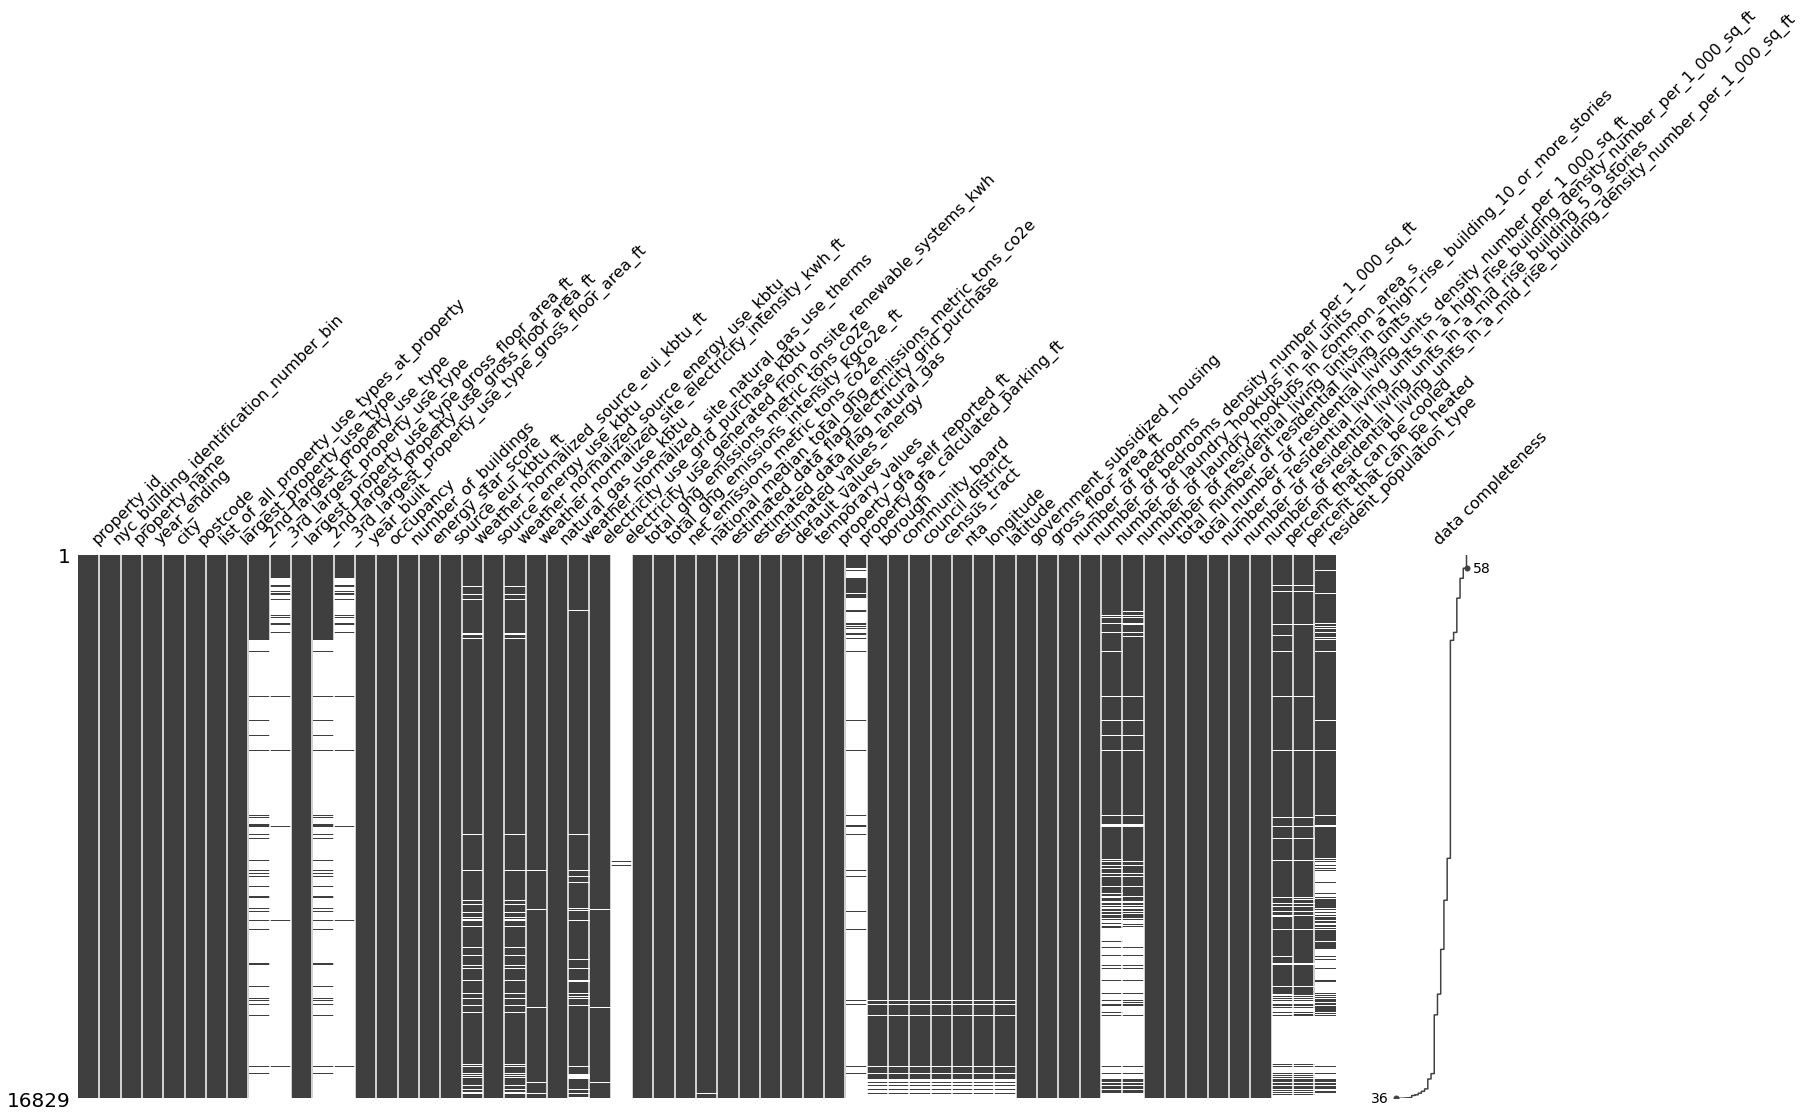

In [82]:
msno.matrix(df2020, labels = True, sort = 'descending')

We see that most of our features have nearly complete data. Additionally many of the missing features are grouped:

* Rows missing a 2nd largest property use type are missing it's square footage (and same for 3rd largest). Most rows don't have any other property use types.
* Weather normalized data is missing for some rows and these are correlated, especially for source energy, and source eui.
* Electricity use from onsite renewables is missing almost everywhere, indicating very few homes have onsite renwable energy.
* The parking square footage is missing in most rows, indicating that most don't have any parking / garages available.
* Some properties are missing all of the location information of borough, community board, council district, census tract, nta (neighborhood tabulation area), latitudem and longiutde.
* Missing values for number of laundry hookups in all units and in common areas are closely correlated though not identical.
* Additional, for multifamily homes, missing values for the number of units that can be cooled and can be heated are also closely correlated.
* Finally, the residential population type is missing many values.

### Categorize columns

We can split the columns in to broad categories - identification, environmental data, property information, and location information.

In [83]:
df2020.columns.tolist()

['property_id',
 'nyc_building_identification_number_bin',
 'property_name',
 'year_ending',
 'city',
 'postcode',
 'list_of_all_property_use_types_at_property',
 'largest_property_use_type',
 '_2nd_largest_property_use_type',
 '_3rd_largest_property_use_type',
 'largest_property_use_type_gross_floor_area_ft',
 '_2nd_largest_property_use_gross_floor_area_ft',
 '_3rd_largest_property_use_type_gross_floor_area_ft',
 'year_built',
 'occupancy',
 'number_of_buildings',
 'energy_star_score',
 'source_eui_kbtu_ft',
 'weather_normalized_source_eui_kbtu_ft',
 'source_energy_use_kbtu',
 'weather_normalized_source_energy_use_kbtu',
 'weather_normalized_site_electricity_intensity_kwh_ft',
 'natural_gas_use_kbtu',
 'weather_normalized_site_natural_gas_use_therms',
 'electricity_use_grid_purchase_kbtu',
 'electricity_use_generated_from_onsite_renewable_systems_kwh',
 'total_ghg_emissions_metric_tons_co2e',
 'total_ghg_emissions_intensity_kgco2e_ft',
 'net_emissions_metric_tons_co2e',
 'national_med

In [104]:
# left out: 'year_ending', 

# to identify the property
id_cols = [
    'property_id',
    'nyc_building_identification_number_bin',
    'property_name',
]

# information about the property
property_cols = [
    'list_of_all_property_use_types_at_property',
    'largest_property_use_type',
    '_2nd_largest_property_use_type',
    '_3rd_largest_property_use_type',
    'largest_property_use_type_gross_floor_area_ft',
    '_2nd_largest_property_use_gross_floor_area_ft',
    '_3rd_largest_property_use_type_gross_floor_area_ft',
    'year_built',
    'occupancy',
    'number_of_buildings',
    'property_gfa_self_reported_ft',
    'property_gfa_calculated_parking_ft',
    'government_subsidized_housing',
    'gross_floor_area_ft',
    'number_of_bedrooms',
    'number_of_bedrooms_density_number_per_1_000_sq_ft',
    'number_of_laundry_hookups_in_all_units',
    'number_of_laundry_hookups_in_common_area_s',
    'number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories',
    'total_number_of_residential_living_units',
    'total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
    'number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
    'number_of_residential_living_units_in_a_mid_rise_building_5_9_stories',
    'number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft',
    'percent_that_can_be_cooled',
    'percent_that_can_be_heated',
    'resident_population_type'
]

# location data
location_cols = [
    'city',
    'postcode',
    'borough',
    'community_board',
    'council_district',
    'census_tract',
    'nta',
    'longitude',
    'latitude',
]

# energy / environmental info about property
environment_cols = [ 
    'energy_star_score',
    'source_eui_kbtu_ft',
    'weather_normalized_source_eui_kbtu_ft',
    'source_energy_use_kbtu',
    'weather_normalized_source_energy_use_kbtu',
    'weather_normalized_site_electricity_intensity_kwh_ft',
    'natural_gas_use_kbtu',
    'weather_normalized_site_natural_gas_use_therms',
    'electricity_use_grid_purchase_kbtu',
    'electricity_use_generated_from_onsite_renewable_systems_kwh',
    'total_ghg_emissions_metric_tons_co2e',
    'total_ghg_emissions_intensity_kgco2e_ft',
    'net_emissions_metric_tons_co2e',
    'national_median_total_ghg_emissions_metric_tons_co2e',
    'estimated_data_flag_electricity_grid_purchase',
    'estimated_data_flag_natural_gas',
    'estimated_values_energy',
    'default_values',
    'temporary_values',
]

### Group by neighbood, census tract, council district, and community board

In [85]:
all_cols(df2020.head())

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
0,1407884,1076177,CitySpire,2020-12-31T00:00:00.000,New york,10019,"Fast Food Restaurant, Multifamily Housing, Off...",Multifamily Housing,Office,Restaurant,375698.0,369742.0,2063.0,1988,95,1,75,115.8,117.5,86773907.6,88081589.8,11.3,178364.9,1783.6,28816190.5,NaN,2625.0,3.5,2625.0,3520.1,True,True,True,True,True,749338,NaN,MANHATTAN,105.0,4.0,137.0,Midtown-Midtown South,-73.979813,40.764538,True,375698.0,600.0,1.59703,20.0,36.0,340.0,340.0,0.90498,0.90498,0.0,0.0,100.0,100.0,NaN
1,1443214,1085803,River Place One,2020-12-31T00:00:00.000,New york,10036,"Bowling Alley, Fitness Center/Health Club/Gym,...",Multifamily Housing,Parking,Bowling Alley,814289.0,39590.0,37681.0,2000,100,1,68,124.5,127.5,110549228.3,113225605.6,6.7,49544807.2,537657.1,20902564.5,NaN,4292.6,4.8,4292.6,4839.3,True,True,True,True,True,887879,39590.0,MANHATTAN,104.0,3.0,117.0,Hudson Yards-Chelsea-Flatiron-Union Square,-73.999917,40.761487,True,814289.0,1700.0,2.08771,0.0,78.0,921.0,921.0,1.13105,1.13105,0.0,0.0,100.0,100.0,NaN
2,1847014,1070014,1755 Broadway & 235 W 56th St,2020-12-31T00:00:00.000,New york,10019,"Fitness Center/Health Club/Gym, Heated Swimmin...",Multifamily Housing,Office,Parking,409506.0,277333.0,31417.0,1985,100,1,70,121.8,126.9,84996775.3,88498937.0,7.5,825446.5,9021.2,17897994.9,NaN,3343.5,4.8,3343.5,4111.6,True,True,True,True,True,697639,31417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,409506.0,580.0,1.41634,0.0,64.0,482.0,482.0,1.17703,1.17703,0.0,0.0,100.0,100.0,NaN
3,2008836,1087842,The Visionaire,2020-12-31T00:00:00.000,New york,10004,"Fitness Center/Health Club/Gym, Multifamily Ho...",Multifamily Housing,Other - Entertainment/Public Assembly,Office,401516.0,22500.0,20335.0,2008,100,1,15,165.0,165.0,75521750.7,75521750.7,9.0,34263364.5,342633.6,14123292.1,NaN,2942.2,6.4,2942.2,2229.8,True,True,True,True,True,457771,14716.0,MANHATTAN,101.0,1.0,31704.0,Battery Park City-Lower Manhattan,-74.016519,40.707060,True,401516.0,512.0,1.27517,251.0,5.0,251.0,251.0,0.62513,0.62513,0.0,0.0,100.0,100.0,NaN
4,2008956,1086547,Site 18B,2020-12-31T00:00:00.000,New york,10282

From the above chart, the same ~500 values are missing for all location types.

In [86]:
df2020['borough'].value_counts(dropna=False)

MANHATTAN    5695
BROOKLYN     4242
BRONX        3752
QUEENS       2517
NaN           494
STATEN IS     129
Name: borough, dtype: int64

In [87]:
df2020['latitude'].value_counts(dropna=False).head()

NaN          495
40.830950      6
40.737145      5
40.841727      5
40.703951      5
Name: latitude, dtype: int64

In [88]:
df2020['nta'].value_counts(dropna=False).head()

Upper West Side                  612
NaN                              495
Flatbush                         463
Upper East Side-Carnegie Hill    439
Washington Heights South         394
Name: nta, dtype: int64

#### Group by location and aggregate property and energy information

In [107]:
for loc_col in ['borough', 'nta', 'council_district']:
    display(all_cols(df2020.groupby(loc_col)[property_cols + environment_cols].mean()))

,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values
borough,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BRONX,79577.861674,8198.939252,6417.740157,1943.895789,99.187100,1.135394,80316.248934,17032.061350,1.0,79577.861674,123.457148,1.622381,2.151267,5.701011,18.871002,77.946887,1.027854,0.071704,48.430677,0.758843,71.888774,94.863017,51.122601,125.741285,129.502873,9.919777e+06,9.792587e+06,5.101243,4.777486e+06,46567.042337,1.409195e+06,3.864187e+04,435.622468,5.629851,435.622468,423.966915,1.0,1.0,1.0,1.0,1.0
BROOKLYN,83539.885314,16867.035924,9497.222222,1951.499764,98.566714,1.202263,85042.971476,18115.122563,1.0,83539.885314,121.927935,1.497541,13.658083,3.550018,19.463696,80.929059,1.012541,0.072294,41.622680,0.551992,72.400592,95.958721,57.065299,111.975837,116.724994,9.668404e+06,1.009353e+07,4.975090,5.206380e+06,59195.218412,1.456452e+06,1.448515e+05,403.220839,4.669165,403.220839,416.826923,1.0,1.0,1.0,1.0,1.0
MANHATTAN,123191.818911,17645.862837,9584.456931,1944.311501,98.820896,1.097103,128328.948727,23100.244556,1.0,123191.818911,166.813120,1.534941,29.295636,7.400354,73.283185,106.782053,0.972759,0.366273,27.225963,0.507201,73.799998,96.273583,57.623178,122.133064,126.688190,1.569743e+07,1.629272e+07,6.128706,5.134688e+06,55741.723986,2.944363e+06,1.910744e+06,641.798139,5.215891,641.795417,649.198946,1.0,1.0,1.0,1.0,1.0
QUEENS,112429.029321,13513.290631,8937.356061,1956.861343,98.696861,2.320620,113766.496226,18269.666667,1.0,112429.029321,171.475717,1.532698,13.608844,5.801574,27.045689,112.931200,1.068853,0.091071,58.199046,0.658090,74.225023,95.697026,57.810489,115.568455,119.960043,1.306081e+07,1.331653e+07,4.802941,6.940567e+06,77423.569039,1.866265e+06,1.085164e+05,560.562773,5.013111,560.562773,581.031029,1.0,1.0,1.0,1.0,1.0
STATEN IS,123337.155039,10481.478261,5494.500000,1969.550388,99.573643,2.635659,124333.155039,22416.842105,1.0,123337.155039,192.946202,1.548873,20.175676,7.405063,14.558140,127.581395,1.111297,0.069514,82.356589,0.562814,77.555556,96.000000,55.240310,115.906977,120.872269,1.444136e+07,1.441936e+07,6.368142,6.716417e+06,81876.403509,2.757645e+06,NaN,595.593023,4.807752,595.593023,618.963566,1.0,1.0,1.0,1.0,1.0


None

,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values
nta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton-Pelham Gardens,46018.000000,NaN,NaN,1951.000000,100.000000,1.000000,46018.000000,NaN,1.0,46018.000000,67.007500,1.501698,0.000000,1.000000,0.000000,48.542500,1.029732,0.000000,15.000000,0.271950,96.666667,100.000000,48.750000,133.100000,137.000000,6.695278e+06,7.371506e+06,7.925000,2.858245e+06,30862.000000,1.314226e+06,NaN,257.300000,5.050000,257.300000,195.625000,1.0,1.0,1.0,1.0,1.0
Astoria,60758.404310,6261.933333,6623.200000,1947.862069,98.706897,1.172414,61569.724138,12553.384615,1.0,60758.404310,94.891034,1.540222,6.795455,2.955056,12.991379,70.576034,1.223044,0.056880,39.431034,0.708468,72.673267,97.821782,63.594828,115.506897,120.957692,6.998723e+06,7.063992e+06,4.804425,3.058924e+06,36307.466981,1.053446e+06,NaN,307.937069,5.270690,307.937069,331.208621,1.0,1.0,1.0,1.0,1.0
Auburndale,69508.600000,NaN,NaN,1952.800000,100.000000,1.000000,69508.600000,NaN,1.0,69508.600000,126.200000,2.490062,11.666667,0.250000,0.000000,78.000000,1.038684,0.000000,21.800000,0.225018,90.000000,98.000000,82.400000,76.860000,82.375000,3.953343e+06,4.542896e+06,1.980000,2.679490e+06,31206.075000,4.070994e+05,NaN,174.680000,3.440000,174.680000,325.940000,1.0,1.0,1.0,1.0,1.0
Baisley Park,230000.000000,NaN,NaN,1962.000000,100.000000,3.000000,230000.000000,NaN,1.0,230000.000000,375.000000,1.630440,0.000000,8.000000,0.000000,215.000000,0.934780,0.000000,215.000000,0.934780,90.000000,100.000000,35.000000,135.100000,140.700000,3.107971e+07,3.235772e+07,14.200000,1.159800e+06,11598.000000,1.066497e+07,NaN,909.100000,4.000000,909.100000,828.800000,1.0,1.0,1.0,1.0,1.0
Bath Beach,143245.521739,8608.250000,3428.000000,1946.478261,98.043478,5.347826,144161.869565,6392.250000,1.0,143245.521739,276.008696,1.589015,18.545455,2.818182,0.000000,170.608696,1.064389,0.000000,138.434783,0.613532,78.000000,99.333333,60.391304,104.608696,109.757143,1.448980e+07,1.602771e+07,4.665000,8.347531e+06,91626.234783,2.197883e+06,NaN,610.626087,4.447826,610.626087,795.808696,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodlawn-Wakefield,57278.200000,3971.100000,1969.800000,1946.755556,98.333333,1.000000,57800.066667,7324.500000,1.0,57278.200000,79.530889,1.412359,0.666667,3.466667,3.511111,59.955556,1.078585,0.0328

None

,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values
council_district,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,185517.719593,24645.787879,9396.712644,1953.005089,97.837150,1.106870,197281.946565,26280.106061,1.0,185517.719593,232.097201,1.333676,54.588710,10.545455,128.675165,155.830636,0.883894,0.448034,21.816794,0.341745,74.568322,97.179103,48.381679,129.063359,134.837366,2.460553e+07,2.536197e+07,8.082697,6.589155e+06,7.253242e+04,5.373952e+06,NaN,933.483461,4.954707,933.483461,902.935623,1.0,1.0,1.0,1.0,1.0
2.0,111661.611752,15196.819767,8198.638889,1955.725055,99.035477,1.077605,116919.000000,20236.640000,1.0,111661.611752,162.191774,1.535690,19.658863,7.145631,80.212106,110.171330,1.062204,0.492508,24.739823,0.485862,75.528242,94.431413,57.146341,124.566519,129.307009,1.458881e+07,1.499595e+07,7.101119,4.066580e+06,4.438911e+04,2.891607e+06,NaN,586.403104,5.056098,586.403104,594.561419,1.0,1.0,1.0,1.0,1.0
3.0,140005.456391,26345.051181,14888.757143,1955.968421,98.496241,1.187970,149300.935338,29481.292135,1.0,140005.456391,191.040376,1.477935,57.274945,7.580435,103.171429,134.059338,1.051831,0.478446,24.425519,0.457029,77.395282,95.766884,57.084211,121.020000,125.631479,1.845547e+07,1.914634e+07,7.045399,6.167468e+06,6.758458e+04,3.809846e+06,NaN,724.587368,4.887368,724.568421,748.870977,1.0,1.0,1.0,1.0,1.0
4.0,164903.455581,17891.523810,9137.697987,1946.330265,98.785961,1.088608,173109.626007,18097.448819,1.0,164903.455581,192.353372,1.246094,38.654135,9.446402,105.156778,118.916974,0.784562,0.565393,9.192175,0.150839,67.527486,96.761235,58.281933,118.693671,123.812919,2.048020e+07,2.144171e+07,6.468917,4.802564e+06,5.256858e+04,3.949313e+06,1.910744e+06,836.293901,5.018067,836.293901,855.994470,1.0,1.0,1.0,1.0,1.0
5.0,155162.998361,17673.432456,8723.342342,1957.914390,98.979964,1.080146,159750.167577,20436.978417,1.0,155162.998361,202.175264,1.454175,39.495098,11.065217,111.226776,136.389271,1.038901,0.551772,18.582878,0.401636,74.902659,97.631217,56.595628,125.577596,129.891171,2.145060e+07,2.217959e+07,6.426740,7.682462e+06,8.316446e+04,4.040422e+06,NaN,860.149909,5.232423,860.149909,792.008197,1.0,1.0,1.0,1.0,1.0
6.0,137715.995479,18234.493488,13019.632184,1934.349734,99.035904,1.041223,142566.904255,30942.196721,1.0,137715.995479,173.128005,1.420769,33.054307,8.026022,81.586436,109.543098,0.915403,0.465442,18.716755,0.358834,73.651497,95.866693,68.776596,106.833644,111.200568,1.570631e+07,1.641424e

None